In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [16]:
def resize_image(img, new_size=(256, 256)):
    return cv.resize(img, new_size)

In [17]:
def insertGambar(folder):
    data = []
    filenames = []
    datalabel = [] 
    path = []
    data_distribution = {}
    for label in (os.listdir(folder)):
        images = os.listdir(folder+label)
        data_distribution[label] = len(images)
        datalabel.append(label)
        print(label)
        count = 0
        for filename in tqdm(os.listdir(folder+label)):
            if count == 100:
                break
            else :
                count += 1
            img = cv.imread(os.path.join(folder+label,filename))
            if img is not None:
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img = resize_image(img, (256, 256))
                filenames.append(filename)
                path.append(label)
                data.append(img)
    return data, filenames, datalabel, path , data_distribution

In [18]:
citras, filenames, labels, path, distribusi = insertGambar("dataset/dataset/")

print("Jumlah gambar:", len(citras))
print("Jumlah label unik:", len(labels))
print("Jumlah nama file:", len(filenames))
print("Distribusi data:", distribusi)


Acne vulgaris


100%|██████████| 100/100 [00:02<00:00, 42.75it/s]


Rosacea


100%|██████████| 100/100 [00:02<00:00, 42.98it/s]

Jumlah gambar: 200
Jumlah label unik: 2
Jumlah nama file: 200
Distribusi data: {'Acne vulgaris': 100, 'Rosacea': 100}


In [20]:
def gray_scaling(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return gray

In [22]:
images = []
for i in range(len(citras)):  
    resize_img = resize_image(citras[i])  
    gray_img = gray_scaling(resize_img)   

    images.append(gray_img)

In [4]:
def display_sample(images):
  plt.figure(figsize=(20,10))
  for i in range(7):
    plt.subplot(1,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap='gray')
  plt.show()    

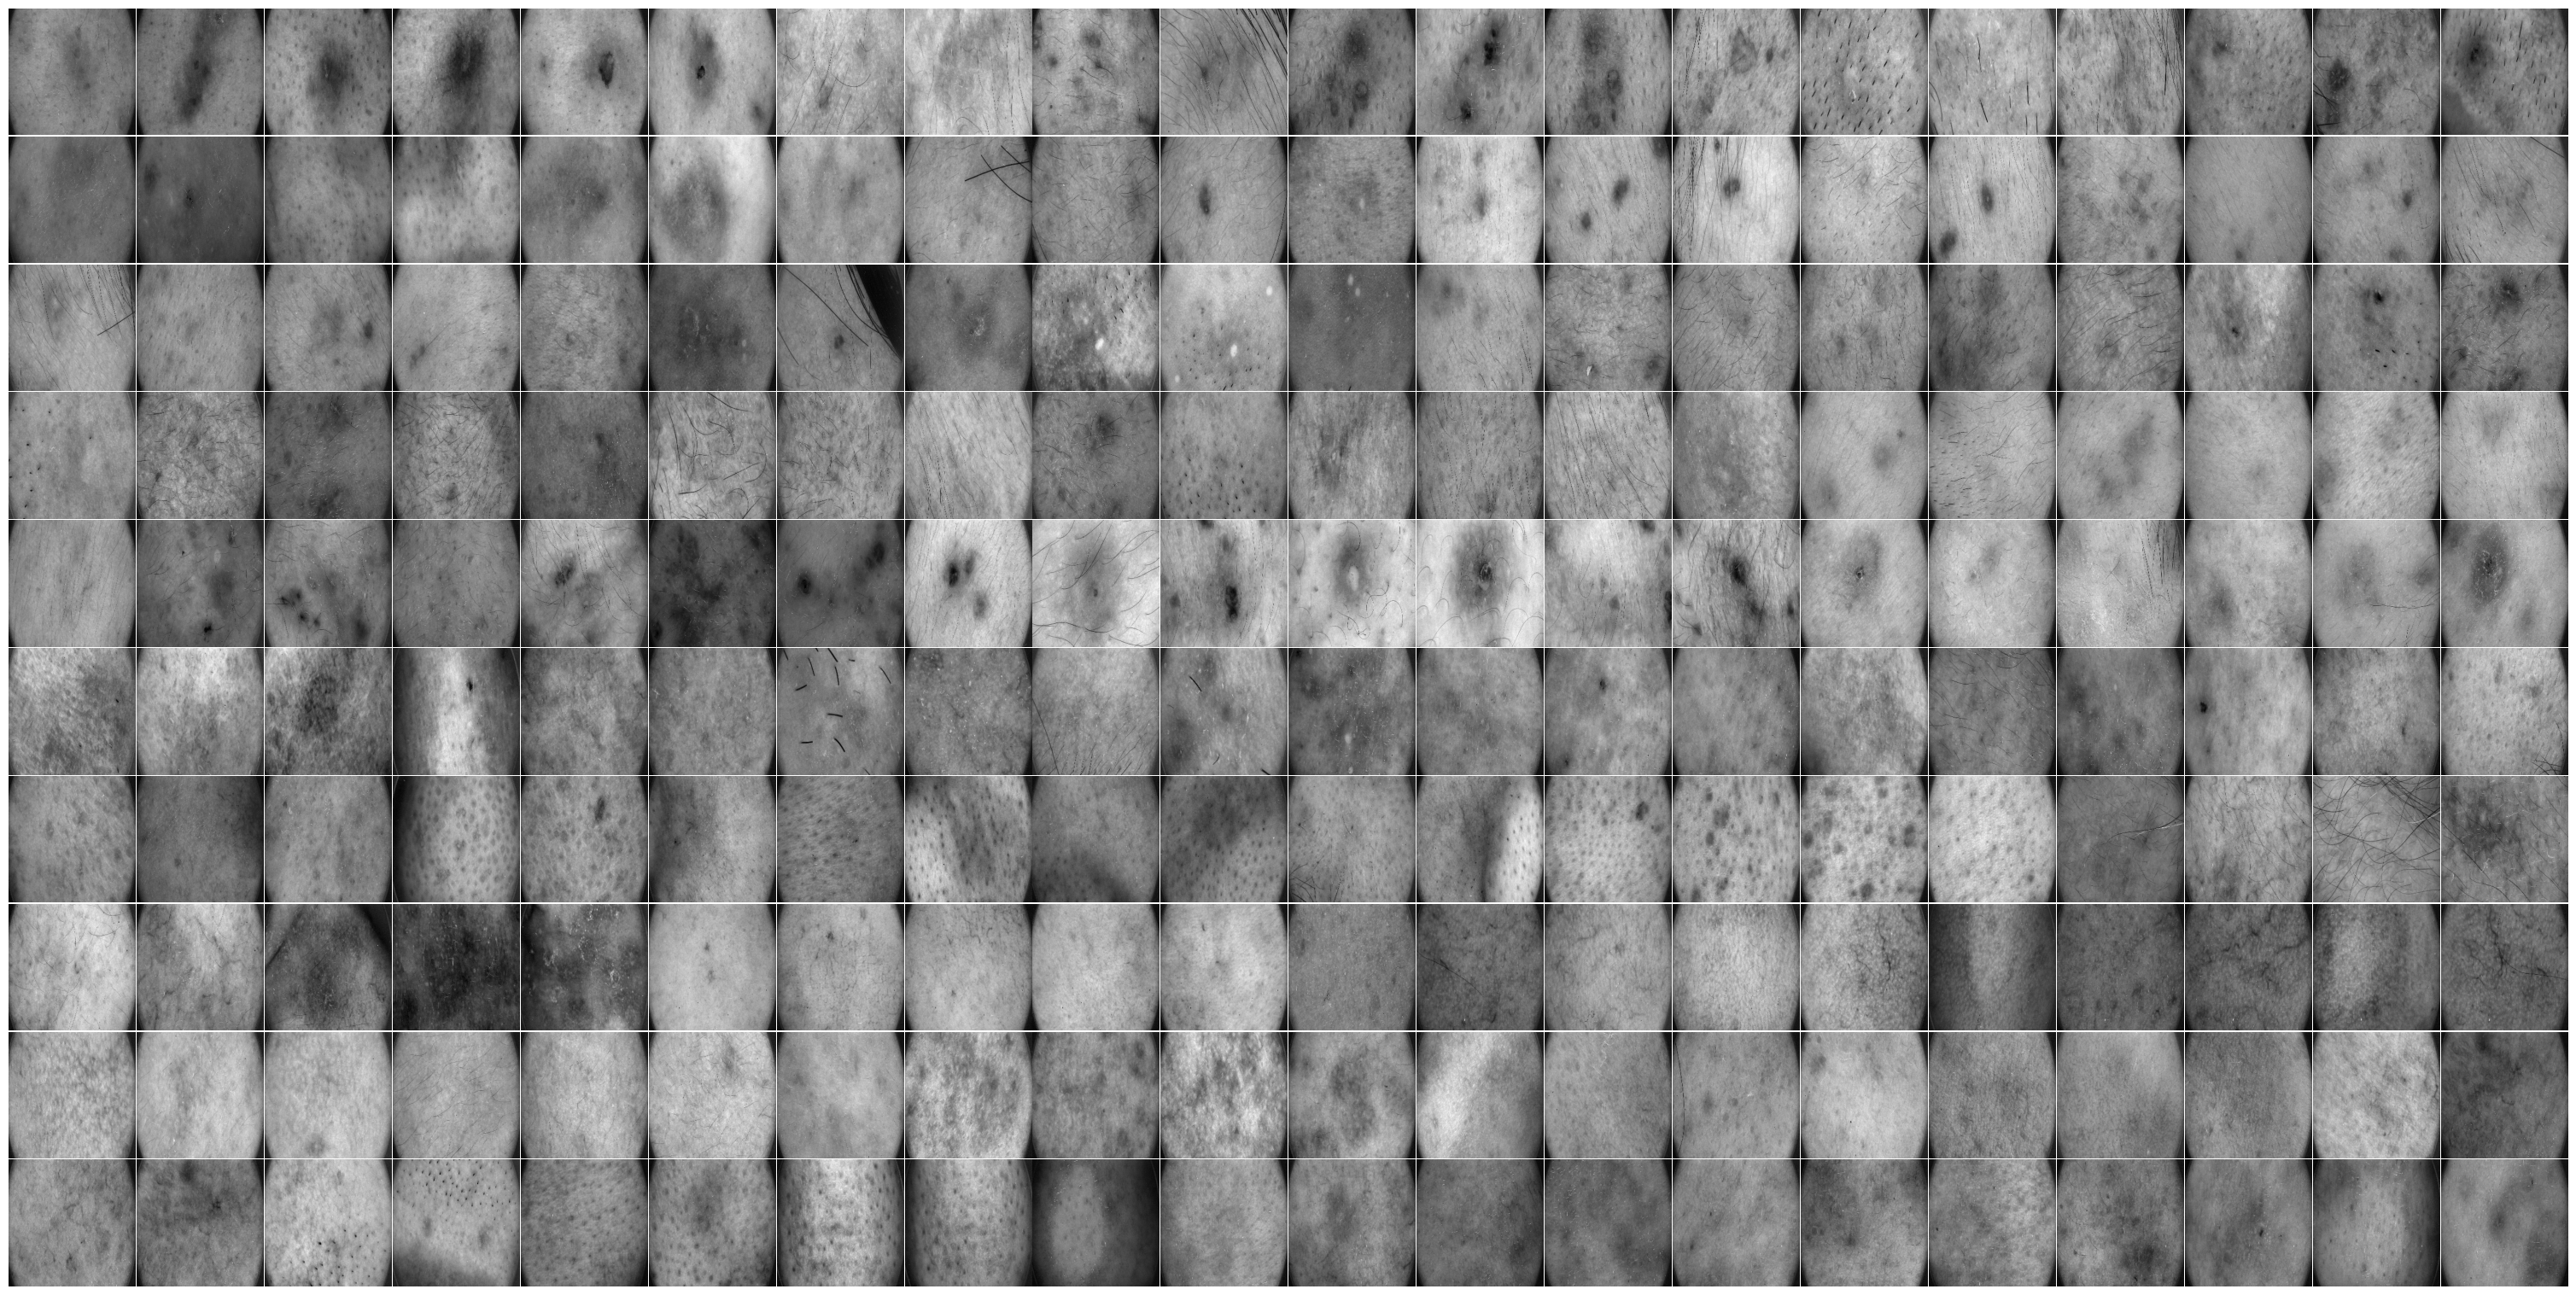

In [23]:
num_images = min(len(images), 200)  

cols = 20  
rows = (num_images // cols) + (1 if num_images % cols else 0)  

fig, axes = plt.subplots(rows, cols, figsize=(30, 15))

for i, ax in enumerate(axes.flat):
    
    if i < num_images:
        img = images[i]  
        ax.imshow(img, cmap='gray')
        ax.axis("off")
    else:
        ax.axis("off")  

plt.tight_layout(pad=0.1)  
plt.show()

<h1>Feature Extraction</h1>

In [6]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

In [7]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

In [8]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

In [9]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

In [10]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

In [11]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

In [12]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

In [13]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

In [24]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(images)):
    D0 = glcm(images[i], 0)
    D45 = glcm(images[i], 45)
    D90 = glcm(images[i], 90)
    D135 = glcm(images[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

In [25]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []

In [26]:
for i in range(len(images)):
    H0 = homogenity(Derajat0[i])
    homogenity0.append(H0)
    H45 = homogenity(Derajat45[i])
    homogenity45.append(H45)
    H90 = homogenity(Derajat90[i])
    homogenity90.append(H90)
    H135 = homogenity(Derajat135[i])
    homogenity135.append(H135)

In [27]:
for i in range(len(images)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

In [28]:
for i in range(len(citras)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

In [29]:
for i in range(len(citras)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

In [30]:
for i in range(len(citras)):  
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

In [31]:
for i in range(len(citras)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

In [32]:
for i in range(len(citras)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

In [33]:
print("Jumlah Labels:", len(path))
print("Jumlah Filename:", len(filenames))
print("Jumlah Kontras0:", len(Kontras0), len(Kontras45), len(Kontras90), len(Kontras135))
print("Jumlah Homogeneity0:", len(homogenity0), len(homogenity45), len(homogenity90), len(homogenity135))
print("Jumlah Dissimilarity0:", len(dissimilarity0), len(dissimilarity45), len(dissimilarity90), len(dissimilarity135))
print("Jumlah Entropy0:", len(entropy0), len(entropy45), len(entropy90), len(entropy135))
print("Jumlah ASM0:", len(ASM0), len(ASM45), len(ASM90), len(ASM135))
print("Jumlah Energy0:", len(energy0), len(energy45), len(energy90), len(energy135))
print("Jumlah Correlation0:", len(correlation0), len(correlation45), len(correlation90), len(correlation135))

Jumlah Labels: 200
Jumlah Filename: 200
Jumlah Kontras0: 200 200 200 200
Jumlah Homogeneity0: 200 200 200 200
Jumlah Dissimilarity0: 200 200 200 200
Jumlah Entropy0: 200 200 200 200
Jumlah ASM0: 200 200 200 200
Jumlah Energy0: 200 200 200 200
Jumlah Correlation0: 200 200 200 200


In [34]:
print(df.describe())  # Lihat ringkasan statistik fitur

NameError: name 'df' is not defined

<h1>CSV</h1>

In [44]:
dataTable = {'Filename': filenames, 'Label': path,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_tanpa_prepro.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_tanpa_prepro.csv')
hasilEkstrak

Filename          Label  Contrast0  Contrast45  Contrast90  Contrast135  \
0    10_1.jpg  Acne vulgaris  24.414982   26.033787   18.882721    27.098039   
1    10_2.jpg  Acne vulgaris  15.888036   18.068897   14.086275    17.221869   
2    10_3.jpg  Acne vulgaris  21.690165   24.069266   14.912071    23.693133   
3    10_4.jpg  Acne vulgaris  18.105224   20.907789   13.368520    19.598139   
4    10_5.jpg  Acne vulgaris  14.867984   17.313602   13.587270    16.176332   
..        ...            ...        ...         ...         ...          ...   
195   9_3.jpg        Rosacea  22.972595   25.866836   18.715533    26.784145   
196   9_4.jpg        Rosacea  20.733762   22.033910   16.044439    23.093979   
197   9_5.jpg        Rosacea  16.758395   18.329027   12.822227    18.099839   
198   9_6.jpg        Rosacea  17.354703   19.388220   13.550613    19.261561   
199   9_7.jpg        Rosacea  22.134835   24.617255   17.164476    24.052518   

     Homogeneity0  Homogeneity45  Homogeneity90  Homogeneity135  ...  \
0        0.270618       0.258632       0.287657        0.254293  ...   
1        0.282819       0.268611       0.297535        0.273694  ...   
2        0.248164       0.234947       0.287721        0.237087  ...   
3        0.271167       0.254545       0.296633        0.261257  ...   
4        0.292867       0.274673       0.301621        0.282078  ...   
..            ...            ...            ...             ...  ...   
195      0.262148       0.244564       0.280386        0.243189  ...   
196      0.274402       0.262044       0.300429        0.260262  ...   
197      0.287397       0.278559       0.316320        0.279225  ...   
198      0.297200       0.287161       0.322314        0.289533  ...   
199      0.269393       0.261643       0.296924        0.265147  ...   

        ASM90    ASM135   Energy0  Energy45  Energy90  Energy135  \
0    0.002171  0.001908  0.045310  0.044068  0.046591   0.043685   
1    0.002332  0.002175  0.047499  0.045966  0.048289   0.046632   
2    0.001450  0.001174  0.035080  0.034050  0.038074   0.034258   
3    0.001334  0.001136  0.034375  0.033093  0.036529   0.033699   
4    0.002400  0.002256  0.048652  0.046892  0.048987   0.047500   
..        ...       ...       ...       ...       ...        ...   
195  0.002293  0.001976  0.046243  0.044717  0.047882   0.044452   
196  0.002726  0.002324  0.049625  0.048311  0.052215   0.048206   
197  0.003376  0.002953  0.055221  0.054406  0.058103   0.054340   
198  0.001557  0.001365  0.037607  0.036824  0.039456   0.036940   
199  0.001823  0.001614  0.040540  0.039827  0.042696   0.040174   

     Correlation0  Correlation45  Correlation90  Correlation135  
0        0.934813       0.930002       0.950866        0.927140  
1        0.949972       0.942888       0.956321        0.945566  
2        0.960670       0.956210       0.973295        0.956894  
3        0.971669       0.967227       0.979212        0.969280  
4        0.957265       0.950011       0.961706        0.953295  
..            ...            ...            ...             ...  
195      0.915176       0.903925       0.932067        0.900516  
196      0.890461       0.883208       0.916477        0.877587  
197      0.909520       0.900350       0.932428        0.901595  
198      0.969860       0.966313       0.976741        0.966532  
199      0.944744       0.938270       0.957871        0.939685  

[200 rows x 30 columns]

<Axes: >

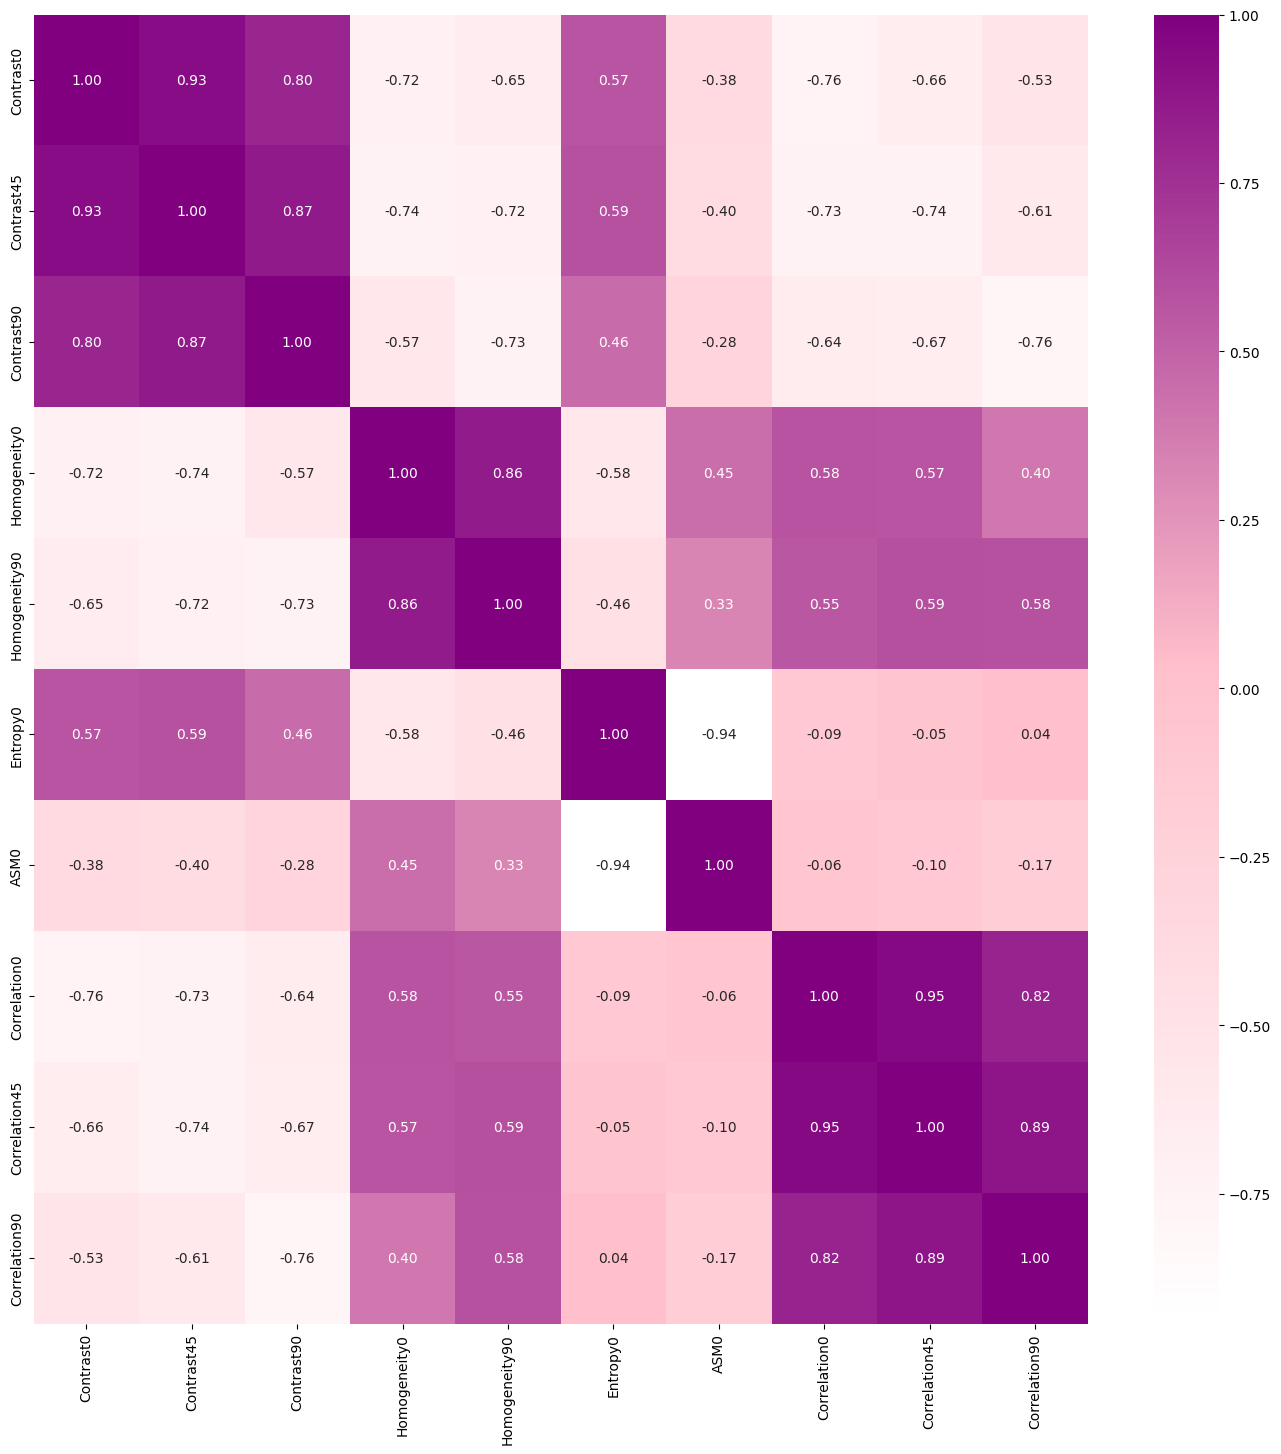

In [36]:
# Menghitung korelasi
correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()

# Menyaring fitur yang memiliki korelasi absolut lebih dari 0.95 dengan label
threshold = 0.95 # atur threshold ini untuk menentukan seberapa besar korelasi yang ingin disaring
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = hasilEkstrak.drop(columns=['Label','Filename']).columns[columns]
x_new = hasilEkstrak[select]
x_new
y = hasilEkstrak['Label']
plt.figure(figsize=(17,17))

pink_cmap = LinearSegmentedColormap.from_list("pink_shade", ["white", "pink", "purple"], N=256)
sns.heatmap(x_new.corr(), annot=True, cmap=pink_cmap, fmt=".2f")

In [37]:
# ubah bagian test_size sesuai kebutuhan
# 0.3 = 30% data untuk testing (train/test 70/30)
# 0.2 = 20% data untuk testing (train/test 80/20)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(140, 10)
(60, 10)


In [38]:

# normalisasi mean std
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

In [39]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

In [40]:
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
               precision    recall  f1-score   support

Acne vulgaris       0.99      0.97      0.98        69
      Rosacea       0.97      0.99      0.98        71

     accuracy                           0.98       140
    macro avg       0.98      0.98      0.98       140
 weighted avg       0.98      0.98      0.98       140

[[67  2]
 [ 1 70]]
Accuracy: 0.9785714285714285

------Testing Set------
               precision    recall  f1-score   support

Acne vulgaris       0.66      0.68      0.67        31
      Rosacea       0.64      0.62      0.63        29

     accuracy                           0.65        60
    macro avg       0.65      0.65      0.65        60
 weighted avg       0.65      0.65      0.65        60

[[21 10]
 [11 18]]
Accuracy: 0.65


In [41]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
               precision    recall  f1-score   support

Acne vulgaris       0.74      0.61      0.67        69
      Rosacea       0.67      0.79      0.73        71

     accuracy                           0.70       140
    macro avg       0.71      0.70      0.70       140
 weighted avg       0.71      0.70      0.70       140

[[42 27]
 [15 56]]
Accuracy: 0.7

------Testing Set------
               precision    recall  f1-score   support

Acne vulgaris       0.86      0.58      0.69        31
      Rosacea       0.67      0.90      0.76        29

     accuracy                           0.73        60
    macro avg       0.76      0.74      0.73        60
 weighted avg       0.77      0.73      0.73        60

[[18 13]
 [ 3 26]]
Accuracy: 0.7333333333333333


In [42]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
               precision    recall  f1-score   support

Acne vulgaris       0.78      0.71      0.74        69
      Rosacea       0.74      0.80      0.77        71

     accuracy                           0.76       140
    macro avg       0.76      0.76      0.76       140
 weighted avg       0.76      0.76      0.76       140

[[49 20]
 [14 57]]
Accuracy: 0.7571428571428571

------Testing Set------
               precision    recall  f1-score   support

Acne vulgaris       0.73      0.52      0.60        31
      Rosacea       0.61      0.79      0.69        29

     accuracy                           0.65        60
    macro avg       0.67      0.65      0.65        60
 weighted avg       0.67      0.65      0.64        60

[[16 15]
 [ 6 23]]
Accuracy: 0.65


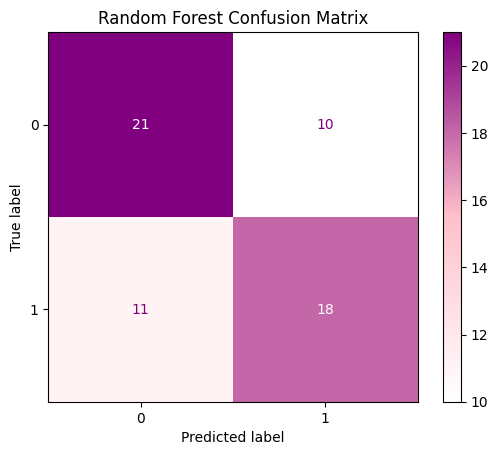

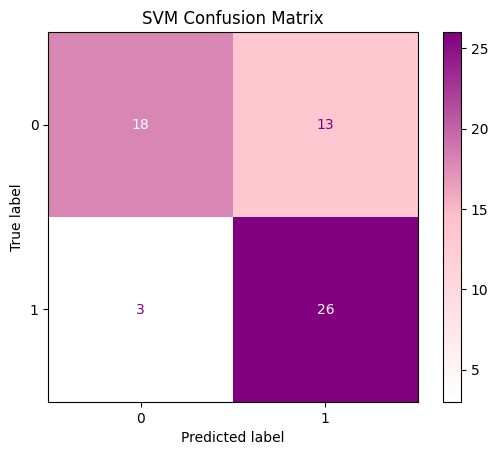

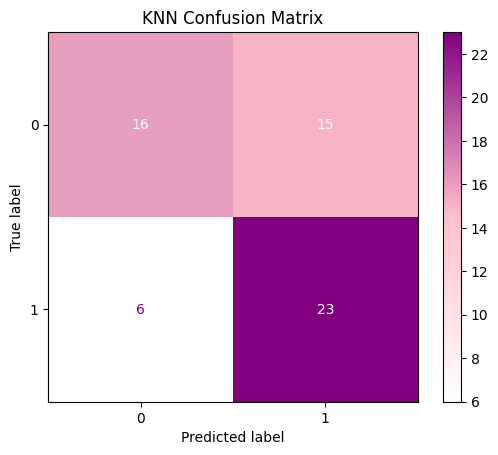

In [43]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=pink_cmap)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")